In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
sns.set_style("darkgrid")

/Users/mengfanying/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# Project Goals

- We will look into the distribution and characteristics of customers.
- We will identify and visualize the important factors contributing to customer churn.
- We will fit a model which can be used to predict customer churn.

# Data Description

The __[dataset](https://www.kaggle.com/mathchi/churn-for-bank-customers)__ used for this project is from Kaggle. This dataset contains 10000 rows and 13 columns. In specific, each row contains one customer’s information, and each column contains one feature of the customers. There is one column containing information about whether the customer exited or not. We will treat this variable as our dependent variable and use other variables to predict if one customer will churn or not.

![Data Table](img/Data_table.png)

In [3]:
# read file
churn = pd.read_csv('churn.csv')

# Exploratory Data Analysis (EDA)

In [4]:
churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# rows and cols
churn.shape

(10000, 13)

*conclusion: 10000 rows and 13 cols*

In [6]:
# data type
churn.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<AxesSubplot:>

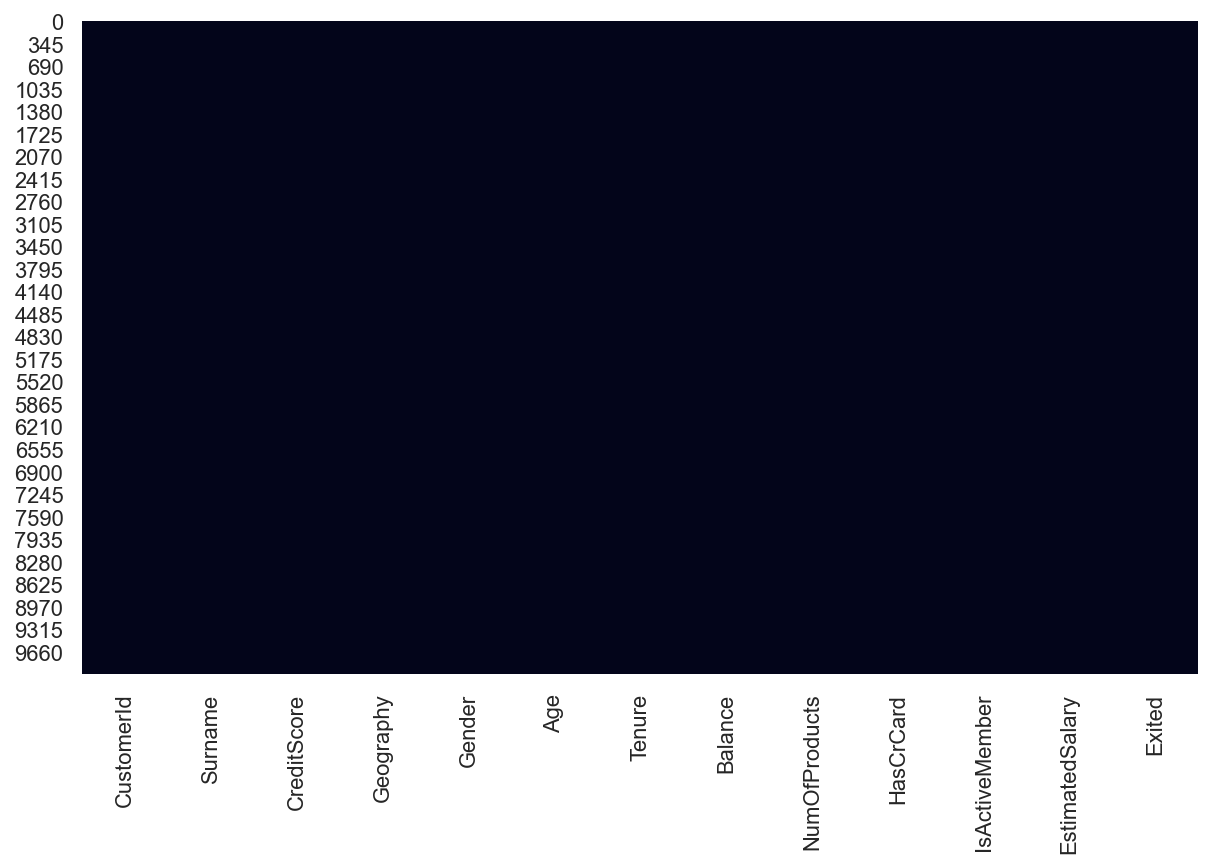

In [7]:
# missing values?
sns.set(rc={'figure.figsize':(10,6)}) # adjust figure size
sns.heatmap(churn.isnull(), cbar=False)

*conclusion: no missing values*

## Summary

In [8]:
churn.describe(include = 'all')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


## Outliers detection

### Boxplot

In [9]:
def show_outliers(df):
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_num_cols = df.select_dtypes(include=numerics)
    sns.set(font_scale = 1) 
    fig, axes = plt.subplots(nrows = 3, ncols = 3, gridspec_kw =  dict(hspace=0.3), figsize = (20,8))
    fig.tight_layout()
    for ax,col in zip(axes.flatten(), df_num_cols.columns):
        sns.boxplot(x = df_num_cols[col],  ax = ax)
    fig.suptitle('Detecting Outliers', color = 'r', fontsize = 18)

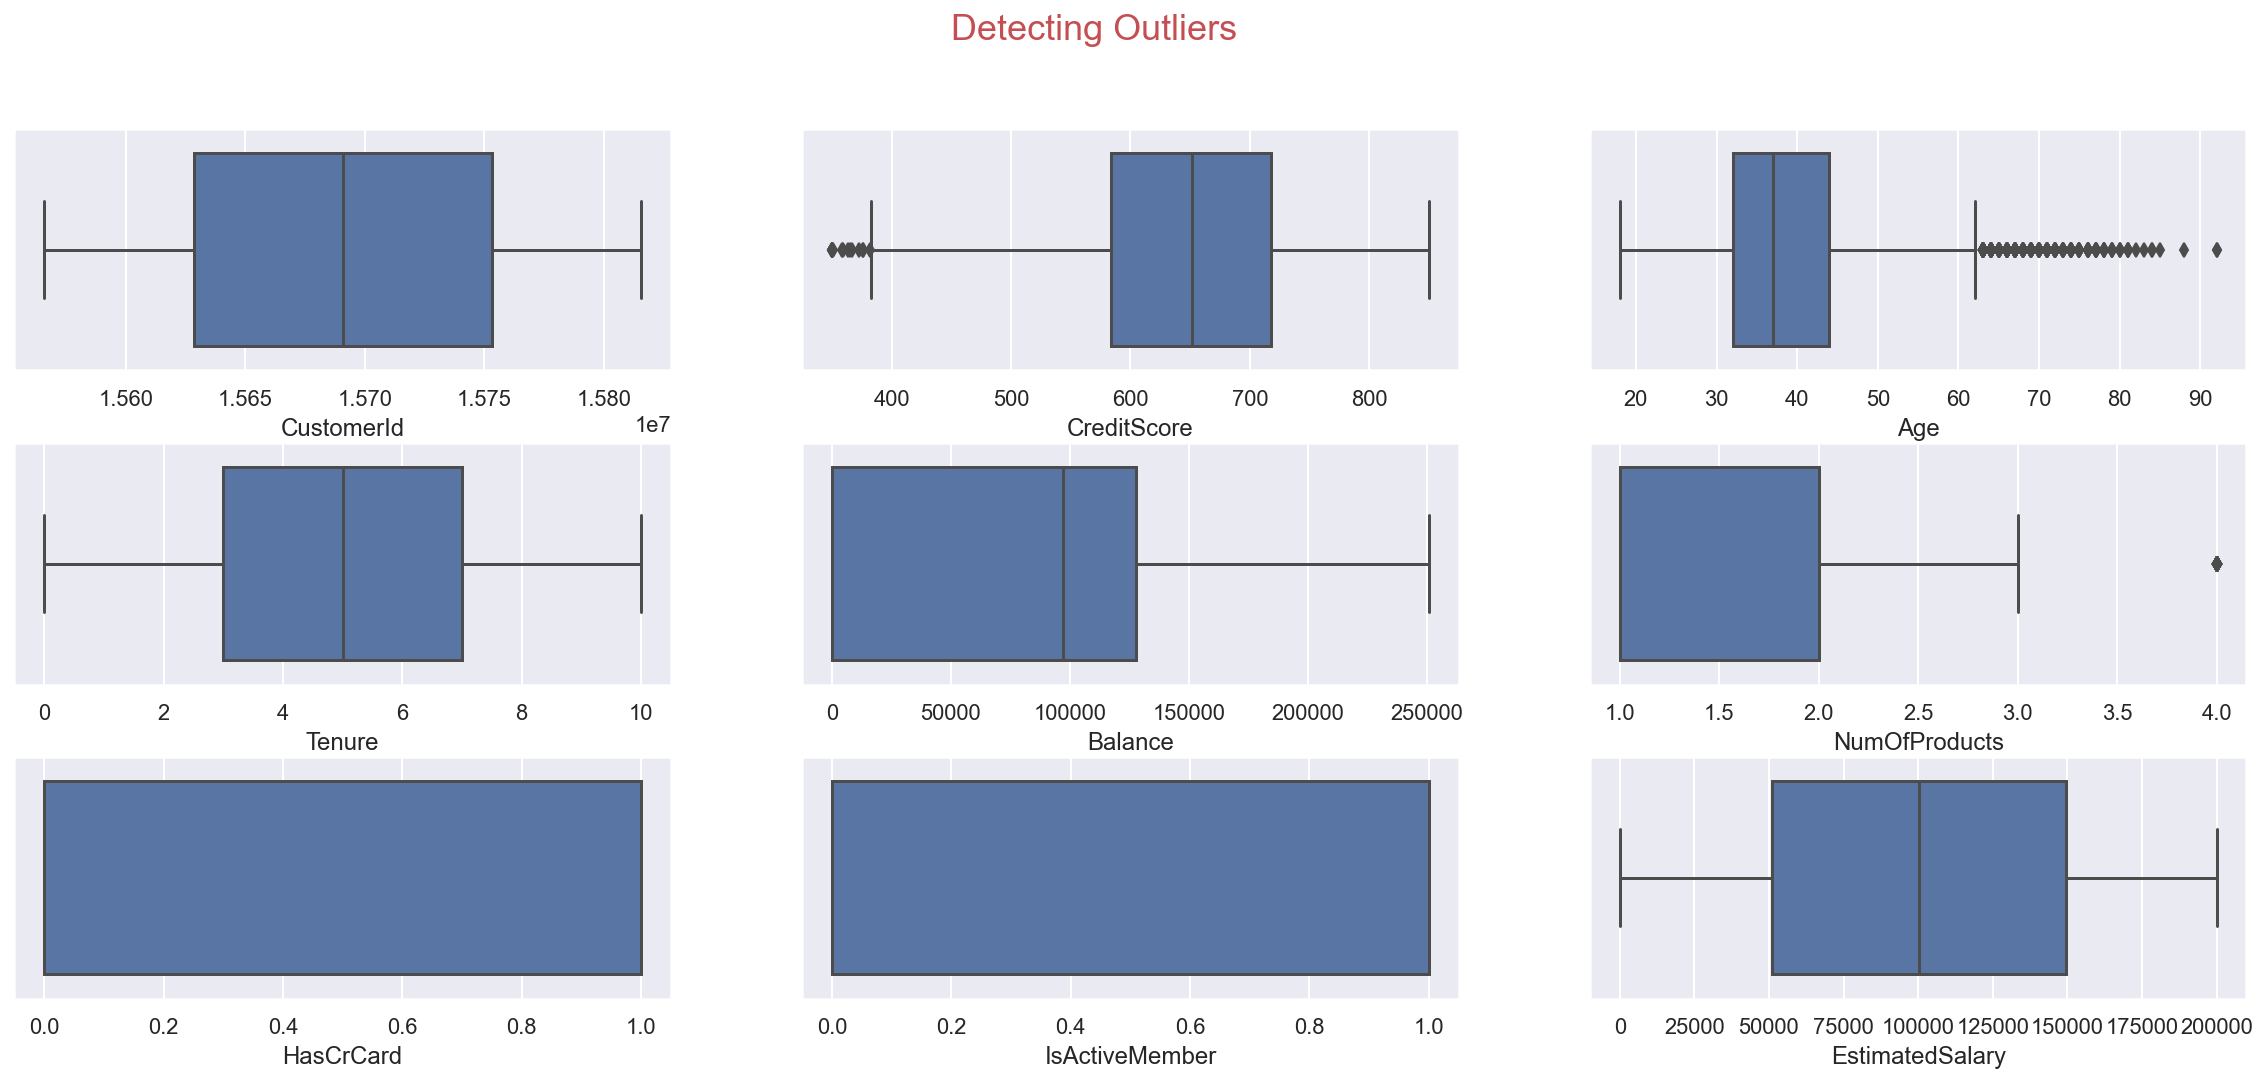

In [10]:
show_outliers(churn)

### 1.5 IQR rule

In [11]:
from scipy import stats

In [12]:
def outlier_detect(col):

    Q1 = np.percentile(col, 25, interpolation = 'midpoint') 
    #Q2 = np.percentile(data, 50, interpolation = 'midpoint') 
    Q3 = np.percentile(col, 75, interpolation = 'midpoint') 

    IQR = stats.iqr(col, interpolation = 'midpoint')

    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    
    print('low_limit is', low_lim)
    print('up_limit is', up_lim)
    
    outlier =[]
    for row in col:
        if ((row > up_lim) or (row < low_lim)):
            outlier.append(row)
    
    if len(outlier) == 0:
        print ('no outlier is detected')
    else:
        print('outlier in the dataset is', outlier)

In [13]:
col_names =  ['CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [14]:
for col in col_names:
    print (f'column name is {col}')
    outlier_detect(churn[col])
    print('\n----------------------------------------------------\n')

column name is CreditScore
low_limit is 383.0
up_limit is 919.0
outlier in the dataset is [376, 376, 363, 359, 350, 350, 358, 351, 365, 367, 350, 350, 382, 373, 350]

----------------------------------------------------

column name is Age
low_limit is 14.0
up_limit is 62.0
outlier in the dataset is [66, 75, 65, 73, 65, 72, 67, 67, 79, 80, 68, 75, 66, 66, 70, 63, 72, 64, 64, 70, 67, 82, 63, 69, 65, 69, 64, 65, 74, 67, 66, 67, 63, 70, 71, 72, 67, 74, 76, 66, 63, 66, 68, 67, 63, 71, 66, 69, 73, 65, 66, 64, 69, 64, 77, 74, 65, 70, 67, 69, 67, 74, 69, 74, 74, 64, 63, 63, 70, 74, 65, 72, 77, 66, 65, 74, 88, 63, 71, 63, 64, 67, 70, 68, 72, 71, 66, 75, 67, 73, 69, 76, 63, 85, 67, 74, 76, 66, 69, 66, 72, 63, 71, 63, 74, 67, 72, 72, 66, 84, 71, 66, 63, 74, 69, 84, 67, 64, 68, 66, 77, 70, 67, 79, 67, 76, 73, 66, 67, 64, 73, 76, 72, 64, 71, 63, 70, 65, 66, 65, 80, 66, 63, 63, 63, 63, 66, 74, 69, 63, 64, 76, 75, 68, 69, 77, 64, 66, 74, 71, 67, 68, 64, 68, 70, 64, 75, 66, 64, 78, 65, 74, 64, 64, 71

## Distribution

In [15]:
def show_numeric_columns_distributions(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_num_cols = df.select_dtypes(include=numerics)
    columns = df_num_cols.columns[: len(df_num_cols.columns)]
    fig = plt.figure()
    fig.set_size_inches(18, 15)
    length = len(columns)
    for i,j in itertools.zip_longest(columns, range(length)):
        plt.subplot((length / 2), 3, j+1)
        plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
        df_num_cols[i].hist(bins = 20, edgecolor = 'black')
        plt.title(i)
    fig = fig.suptitle('Distributions', color = 'r' ,fontsize = 18)
    plt.show()

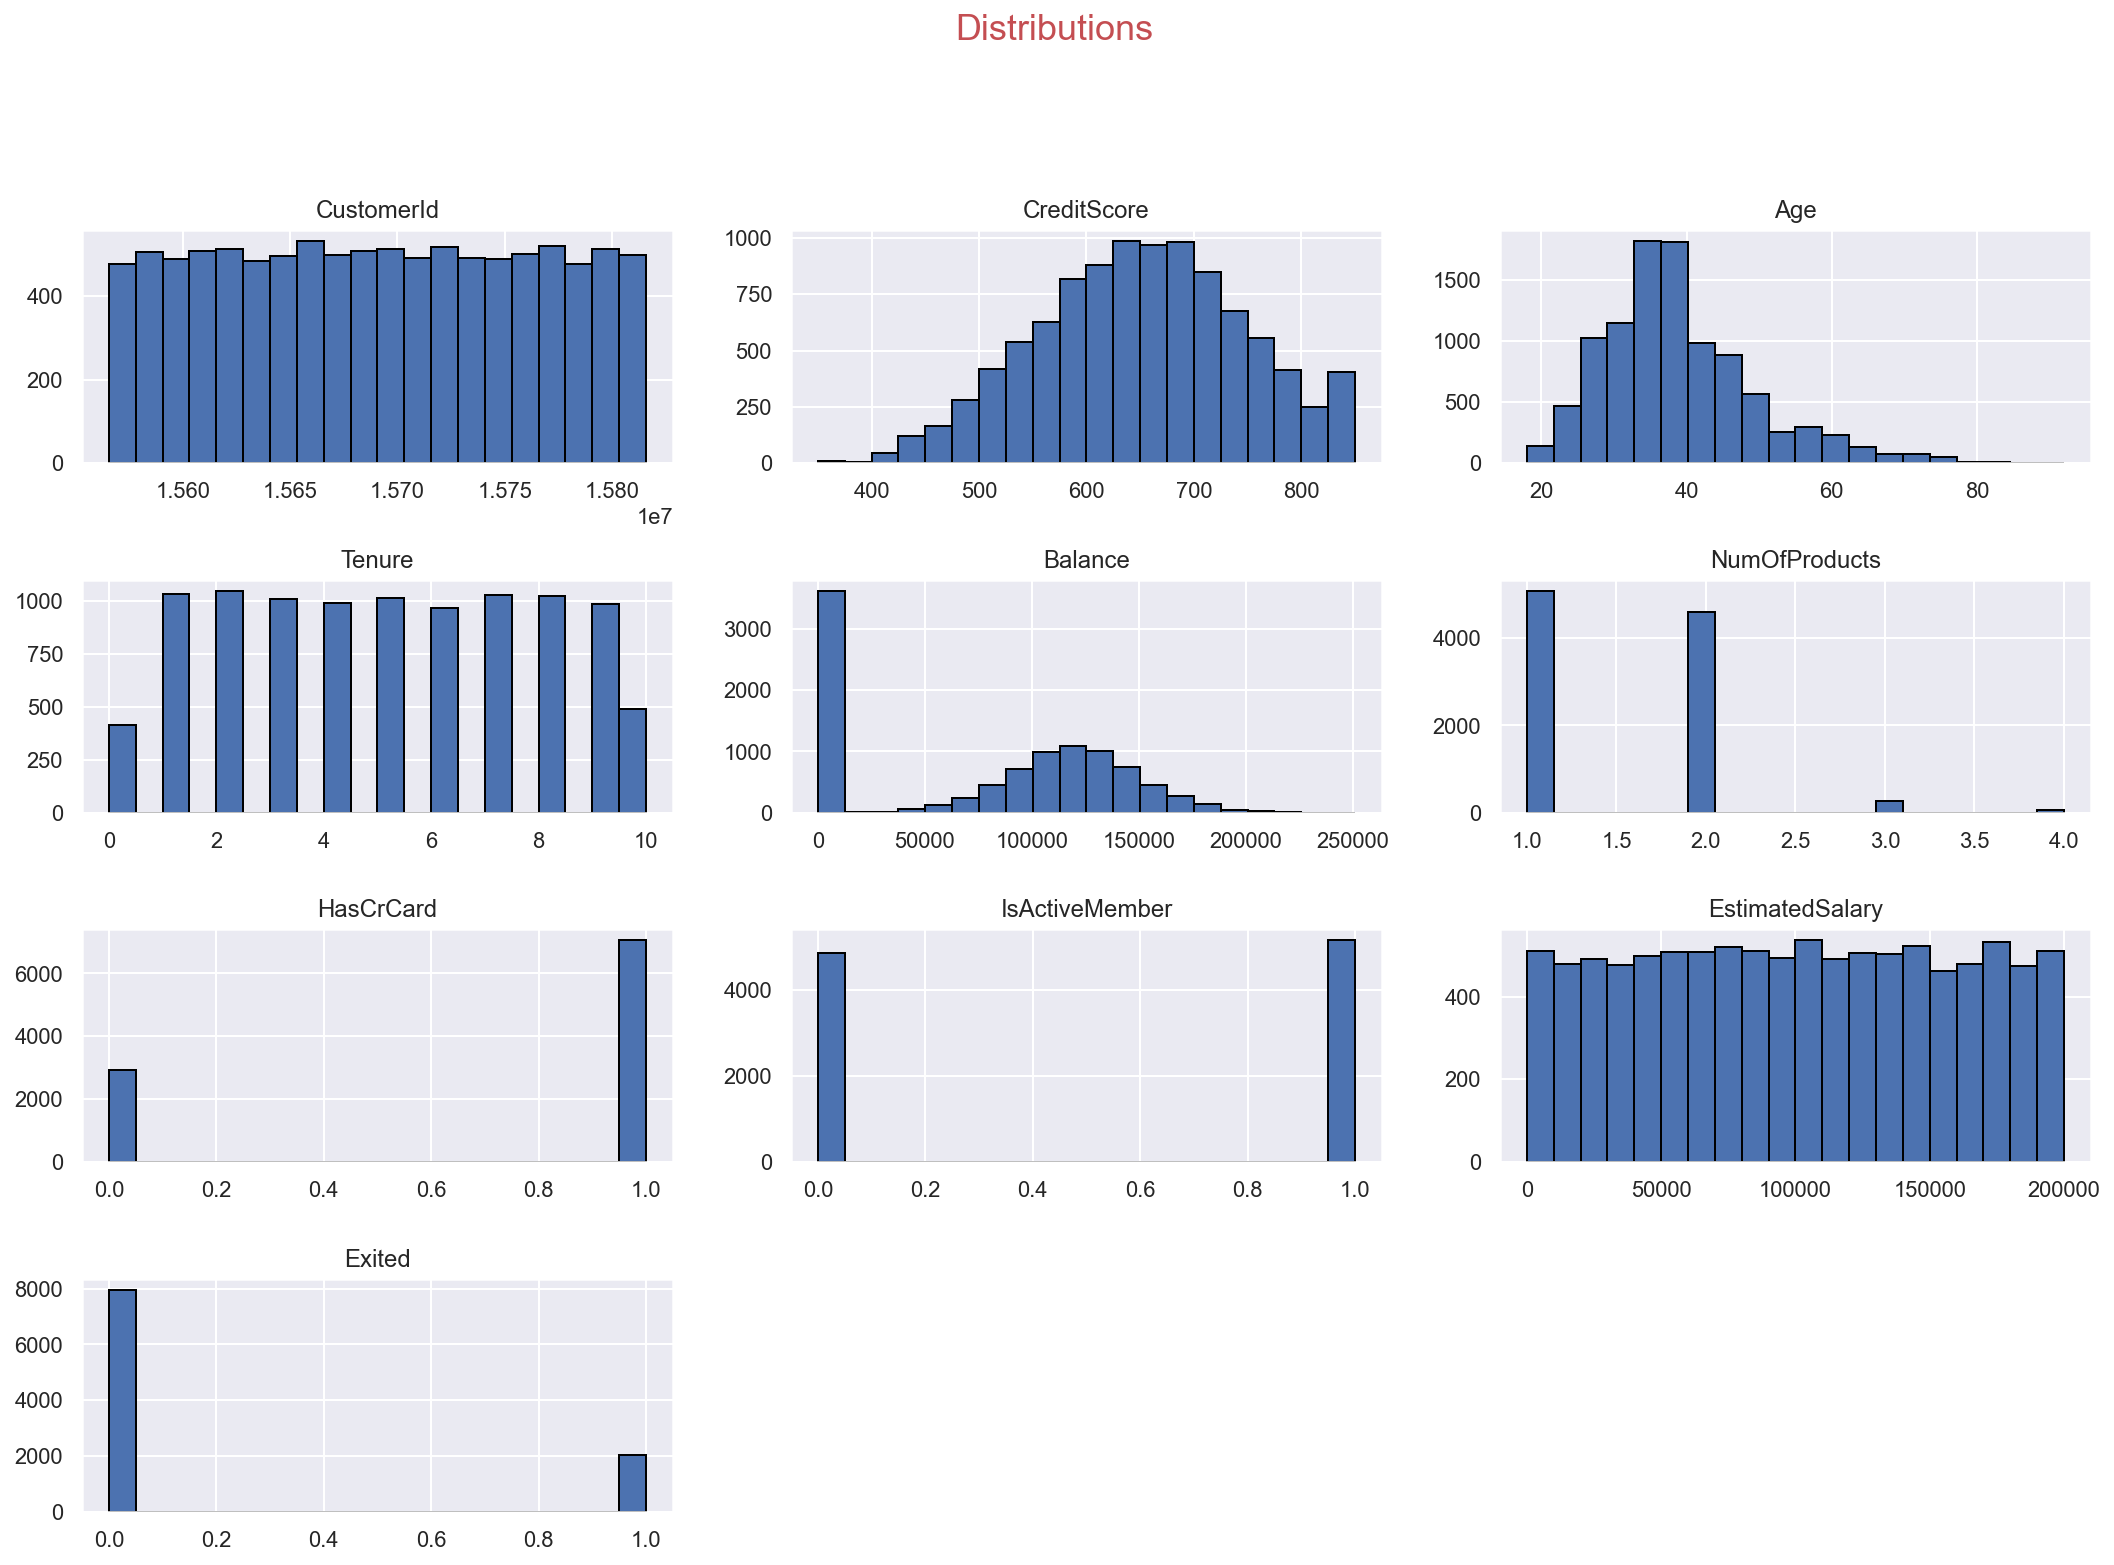

In [16]:
show_numeric_columns_distributions(churn)

## Correlation

(10.5, -0.5)

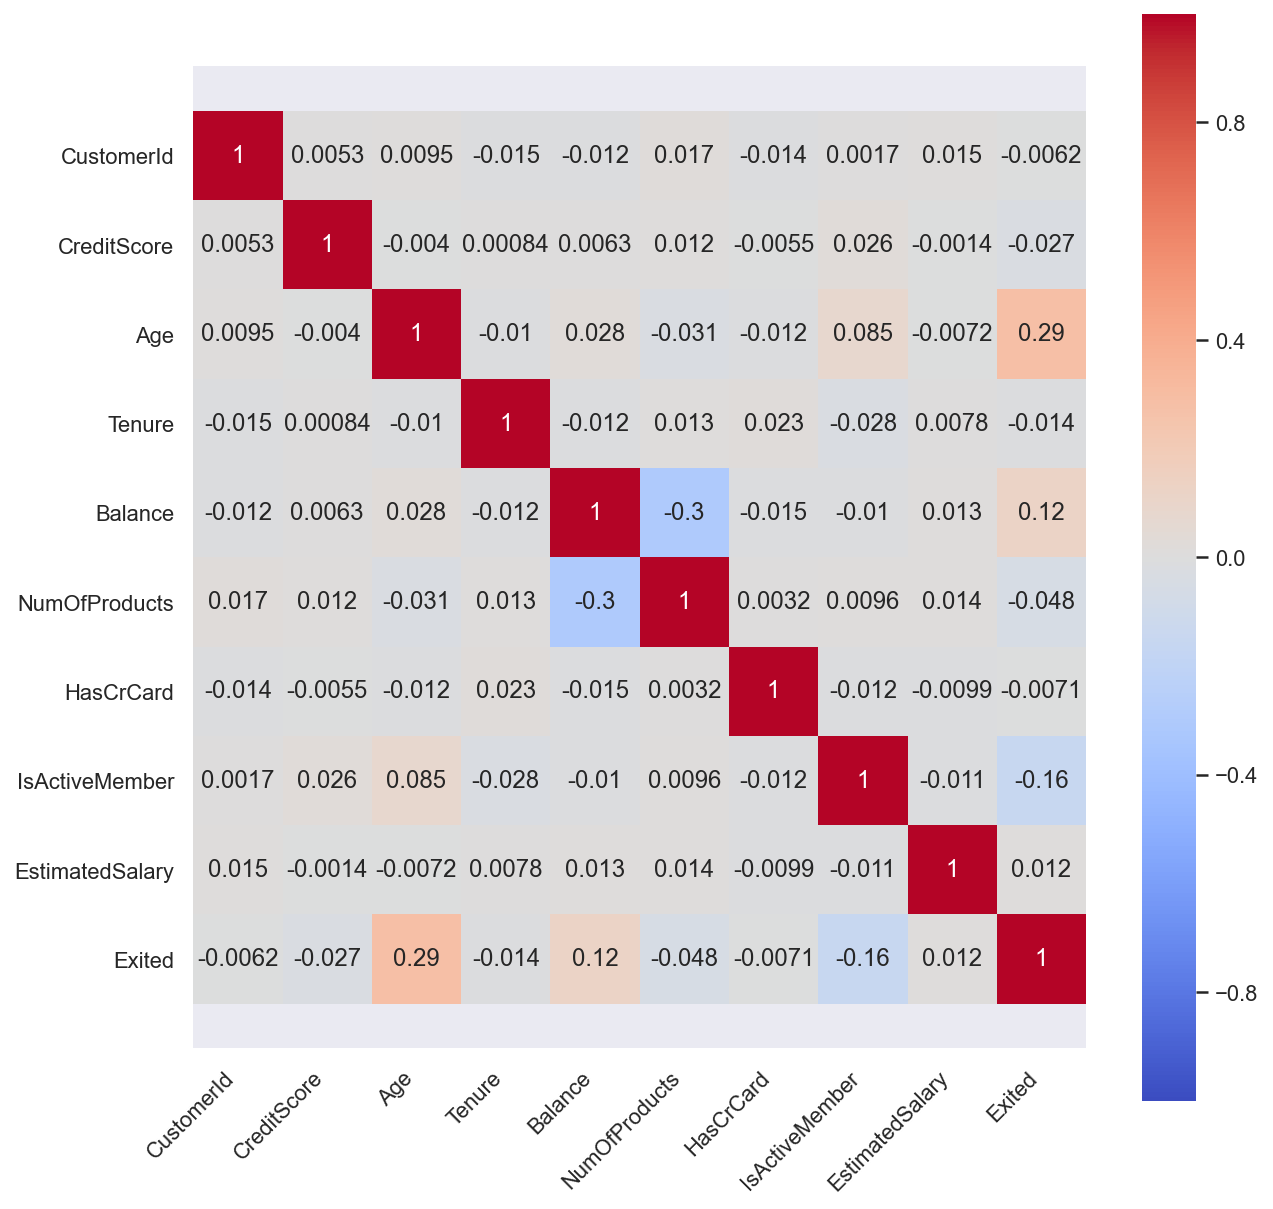

In [17]:
# Correlations
corr = churn.corr()

f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap="coolwarm",
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Data Visualization

### Pie chart for variable 'Exited'

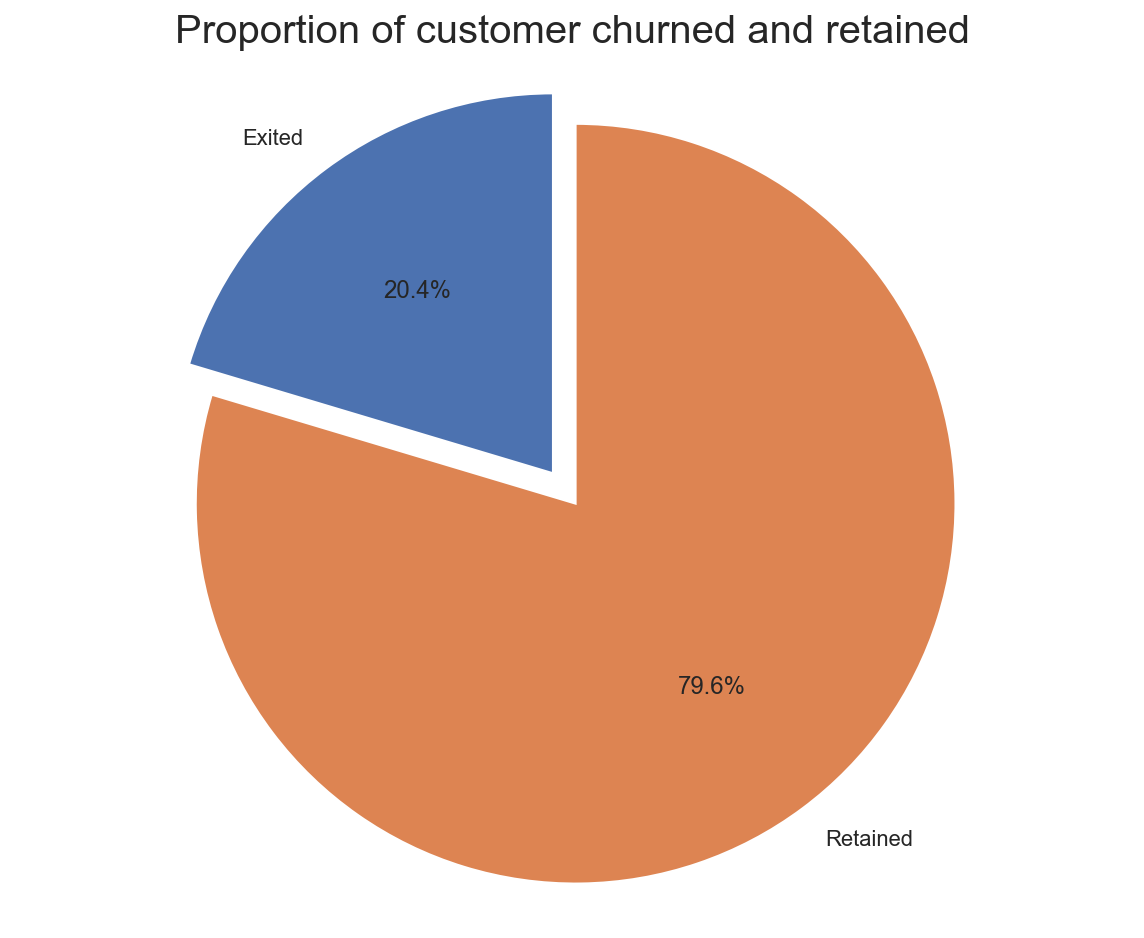

In [18]:
# pie chart
labels = 'Exited', 'Retained'
sizes = [churn.Exited[churn['Exited']==1].count(), churn.Exited[churn['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

*Conclusion: The classes are imbalanced*

### Countplot

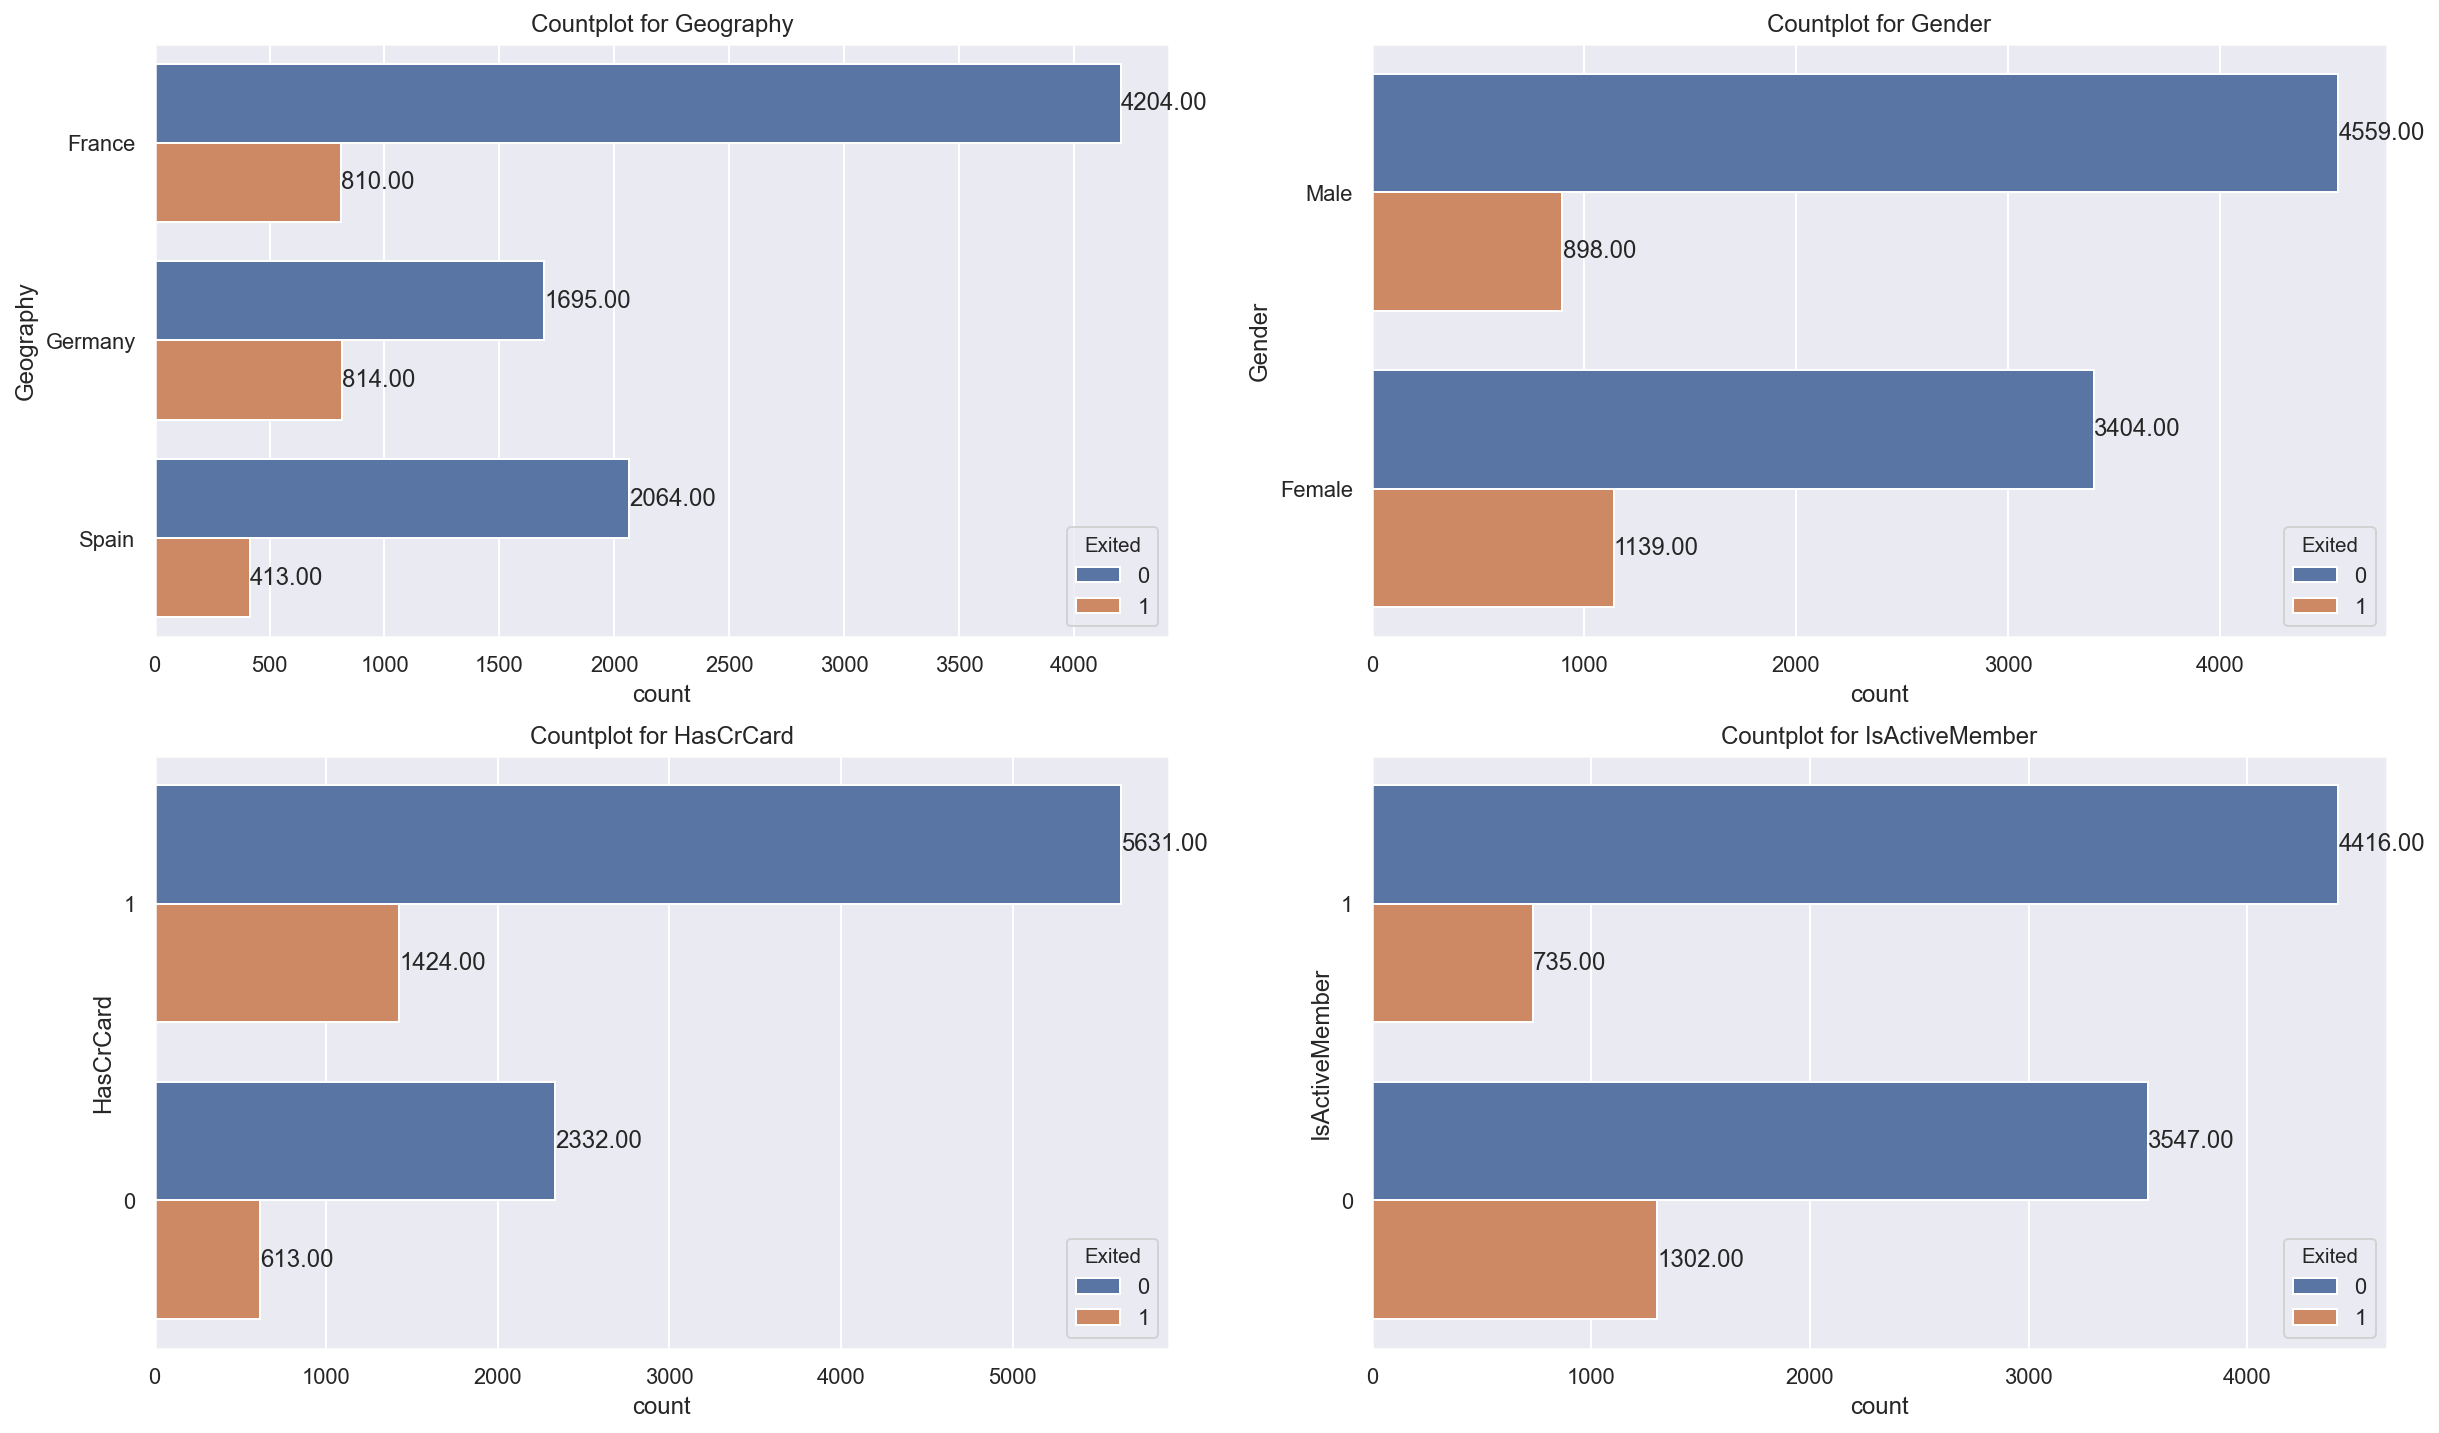

In [19]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))

# countplot --> Geography
ax = sns.countplot(y="Geography", 
              data=churn,
              hue='Exited',
              ax=axarr[0][0],
              order = churn['Geography'].value_counts().index)

ax.set_title('Countplot for Geography')

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment
    
# countplot --> Gender
ax = sns.countplot(y="Gender", 
              data=churn,
              hue='Exited',
              ax=axarr[0][1],
              order = churn['Gender'].value_counts().index)

ax.set_title('Countplot for Gender')

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment


# countplot --> HasCrCard
ax = sns.countplot(y="HasCrCard", 
              data=churn,
              ax=axarr[1][0],
              hue='Exited',
              order = churn['HasCrCard'].value_counts().index)

ax.set_title('Countplot for HasCrCard')

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment


# countplot --> IsActiveMember
ax = sns.countplot(y="IsActiveMember", 
              data=churn,
              ax=axarr[1][1],
              hue='Exited',
              order = churn['IsActiveMember'].value_counts().index)

ax.set_title('Countplot for IsActiveMember')

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

### Boxplot

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

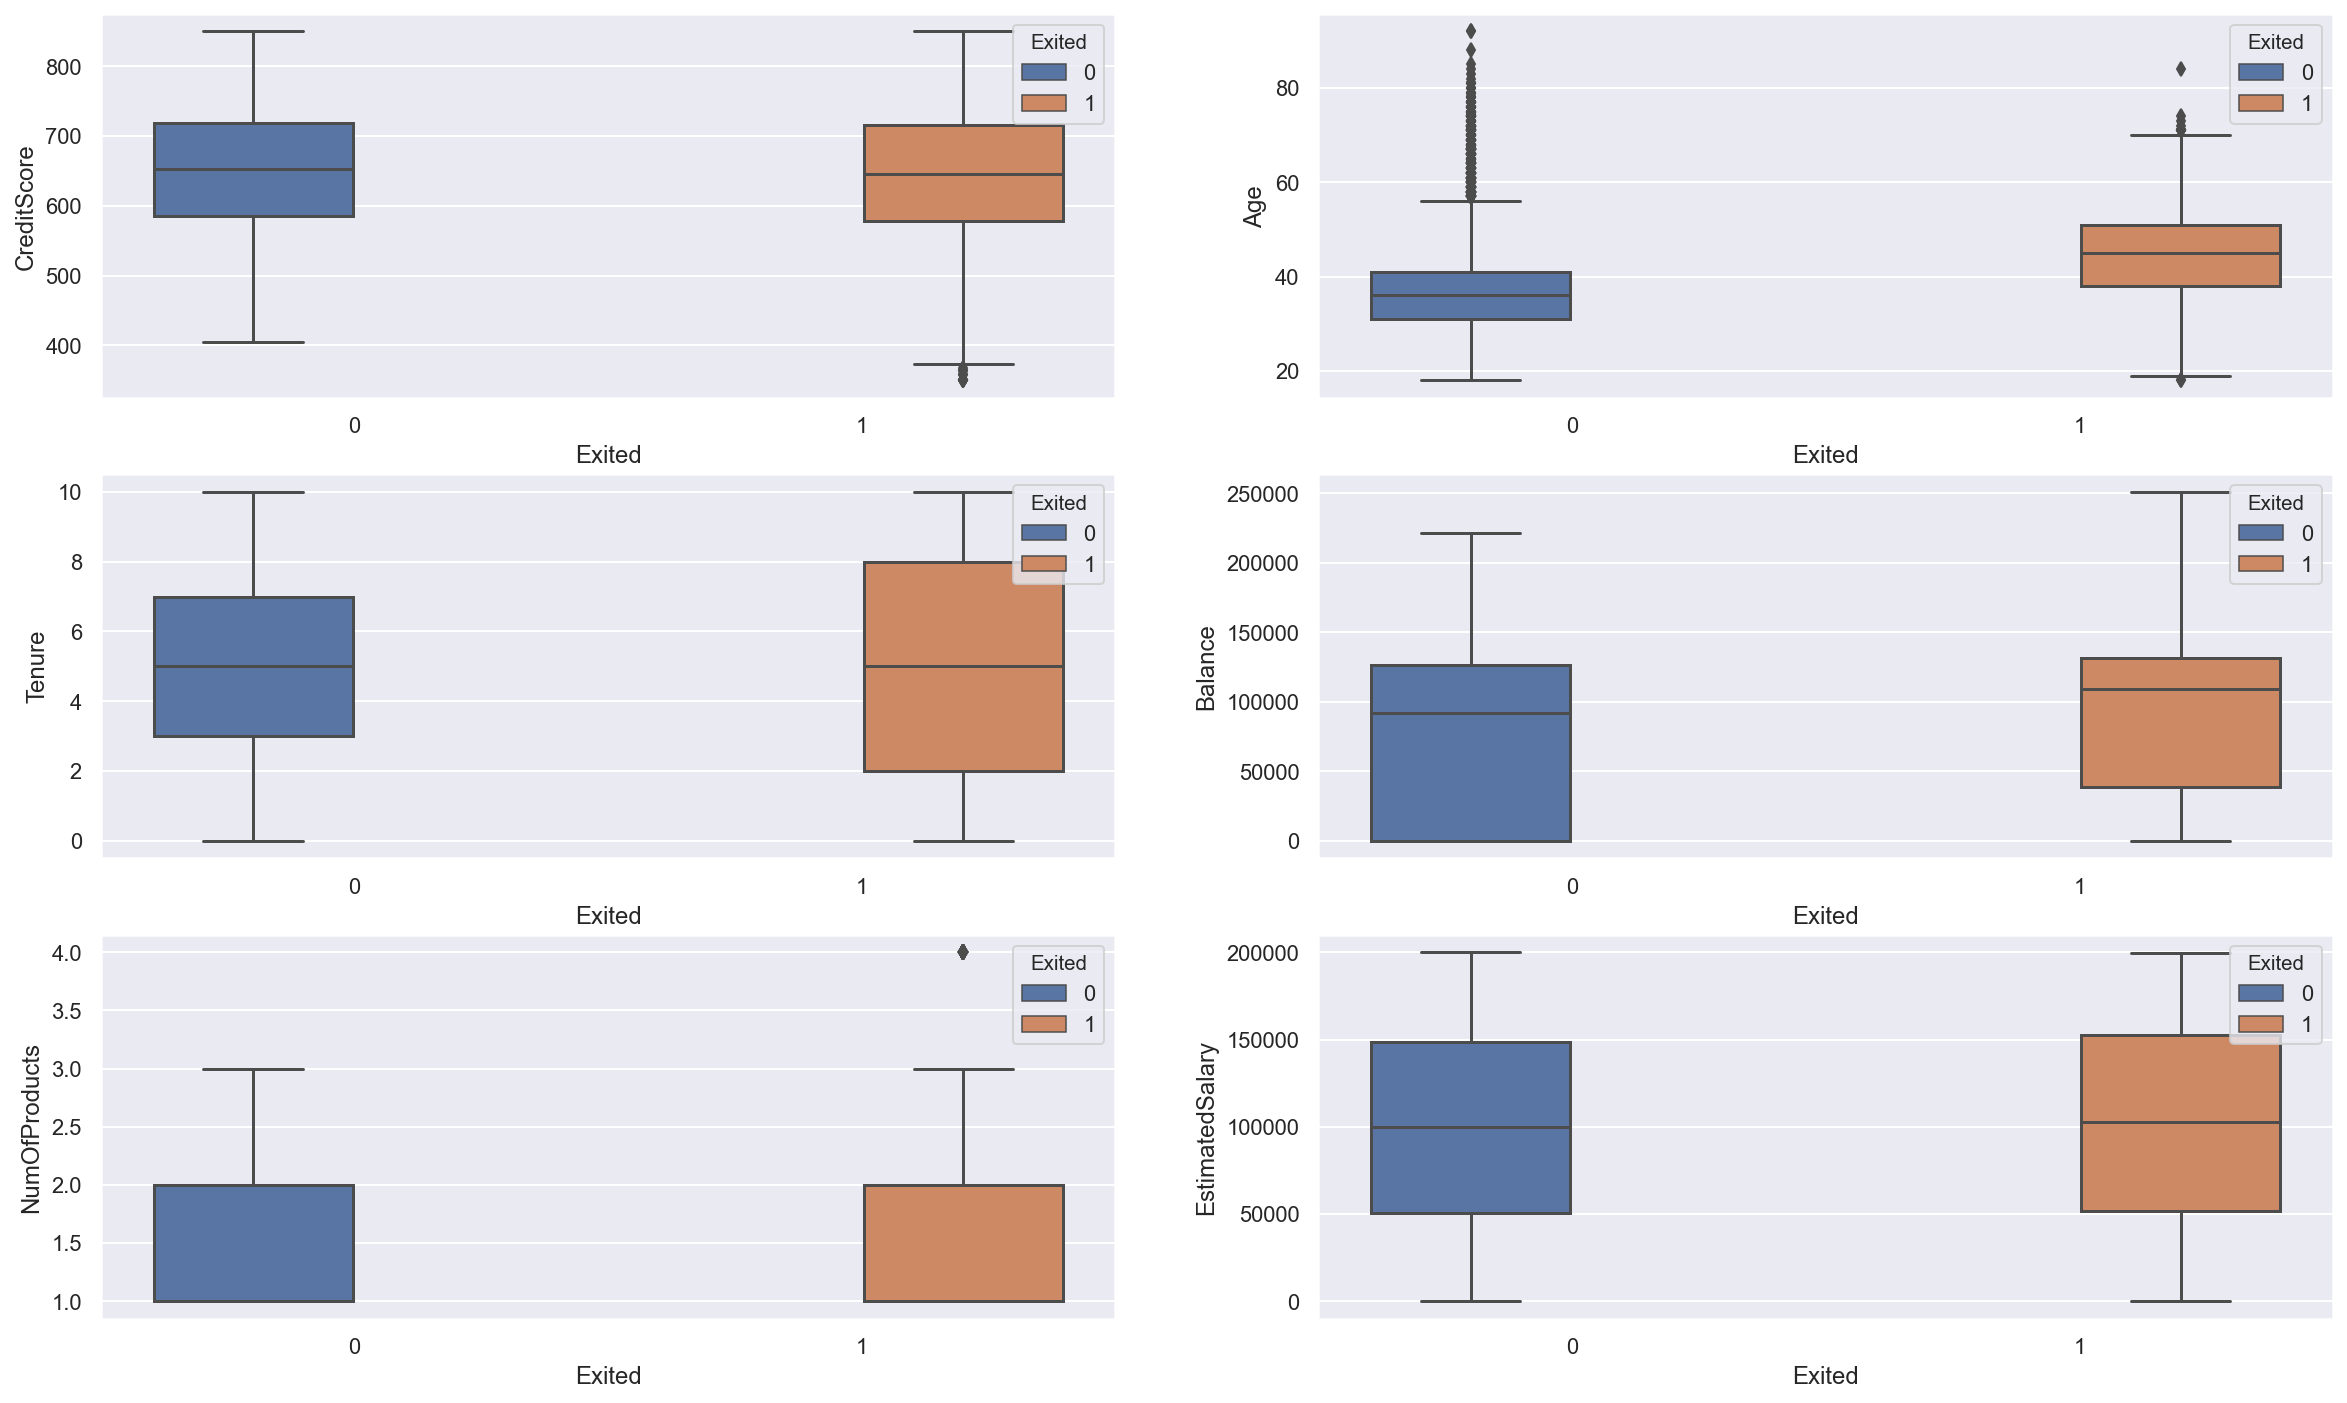

In [20]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))

sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = churn , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[2][1])

****

# Data Preprocessing

## Feature engeneering

In [21]:
churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Credit Score grouping
- Excellent: 800 to 850
- Very Good: 740 to 799
- Good: 670 to 739
- Fair: 580 to 669
- Poor: 300 to 579

[reference](https://www.investopedia.com/terms/c/credit_score.asp)

In [22]:
def credit_score_grouping(x):
    
    if x >= 300 and x < 579:
        return "Poor"
    elif x >= 580 and x < 669:
        return "Fair"
    elif x >= 670 and x < 739:
        return "Good"
    elif x >= 740 and x < 799:
        return "Very Good"
    elif x >= 800:
        return "Excellent"

In [23]:
churn['CreditScore_group'] = churn['CreditScore'].apply(lambda x: credit_score_grouping(x))

In [24]:
#churn.head()

In [25]:
churn['CreditScore_group'].value_counts()

Fair         3295
Good         2401
Poor         2325
Very Good    1212
Excellent     655
Name: CreditScore_group, dtype: int64

<AxesSubplot:xlabel='CreditScore_group', ylabel='count'>

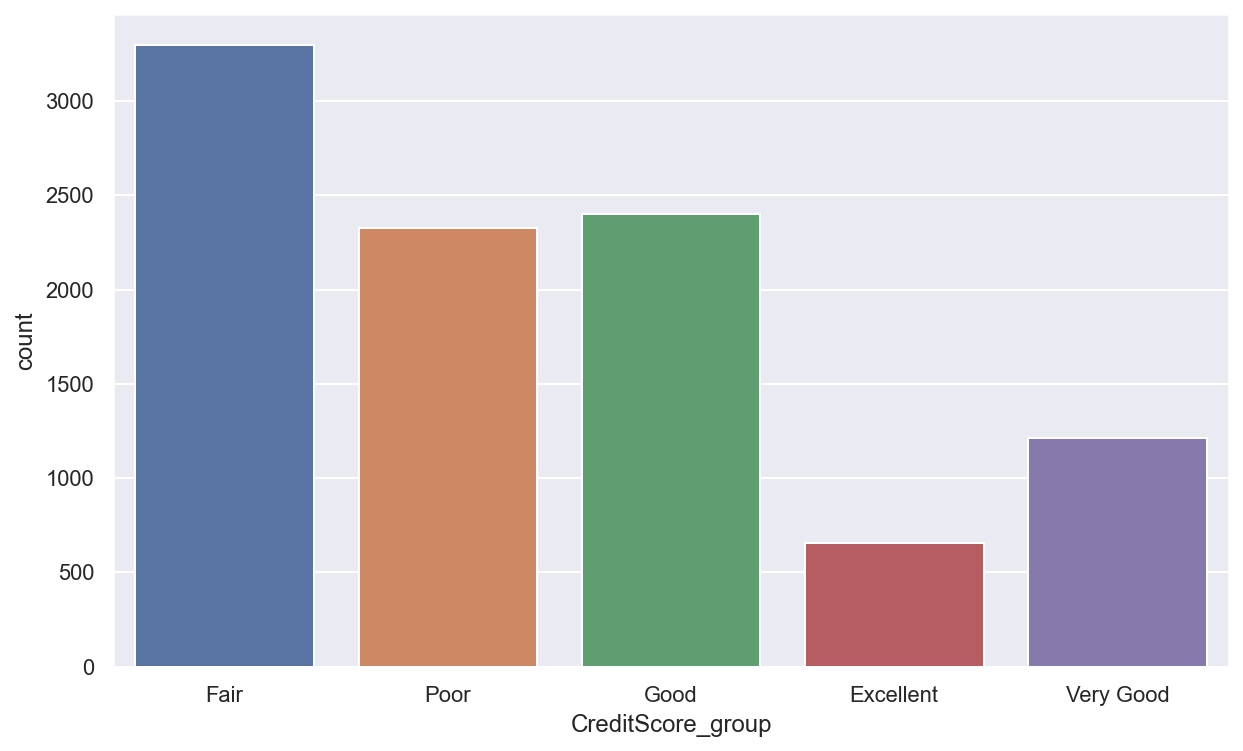

In [26]:
sns.countplot(x="CreditScore_group", data=churn)

### Number of products rate by year

In [27]:
#churn['NumOfProducts'].value_counts()
#churn['Tenure'].value_counts()

In [28]:
def products_utilization_rate_by_year(numProduct, tenure):
    if tenure == 0:
        return numProduct # treat tenure = 0 and tenure = 1 the same
    else:
        rate = numProduct / tenure
        return rate

In [29]:
churn['products_utilization_rate_by_year'] = churn.apply(lambda x: products_utilization_rate_by_year(x['NumOfProducts'], x['Tenure']), axis=1)

In [30]:
churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_group,products_utilization_rate_by_year
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair,0.500
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair,1.000
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor,0.375
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good,2.000
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent,0.500


### Recalculate salary based on monthly average salaries in each country
- France: 3097
- Germany: 4094
- Spain: 2279

[reference](https://en.wikipedia.org/wiki/List_of_European_countries_by_average_wage)

In [31]:
def countries_monthly_average_salaries(salary, country):
   
    France = 3097   
    Germany = 4094
    Spain = 2279
        
    salary_monthly = salary / 12
    
    if country == 'France':
        return salary_monthly / France
    elif country == "Germany":
        return salary_monthly / Germany
    elif country == "Spain": 
        return salary_monthly / Spain

In [32]:
churn['countries_monthly_average_salaries'] = churn.apply(lambda x: countries_monthly_average_salaries(x['EstimatedSalary'], x['Geography']), axis=1)

## Encoding (get dummies)

In [33]:
churn.dtypes

CustomerId                              int64
Surname                                object
CreditScore                             int64
Geography                              object
Gender                                 object
Age                                     int64
Tenure                                  int64
Balance                               float64
NumOfProducts                           int64
HasCrCard                               int64
IsActiveMember                          int64
EstimatedSalary                       float64
Exited                                  int64
CreditScore_group                      object
products_utilization_rate_by_year     float64
countries_monthly_average_salaries    float64
dtype: object

In [34]:
churn = pd.get_dummies(churn, columns=['Geography', 'Gender', 'CreditScore_group'])

In [35]:
churn.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore_group_Excellent,CreditScore_group_Fair,CreditScore_group_Good,CreditScore_group_Poor,CreditScore_group_Very Good
0,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,...,1,0,0,1,0,0,1,0,0,0
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,...,0,0,1,1,0,0,1,0,0,0
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,...,1,0,0,1,0,0,0,0,1,0
3,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,...,1,0,0,1,0,0,0,1,0,0
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,...,0,0,1,1,0,1,0,0,0,0


In [36]:
churn.drop(['CustomerId', 'Surname', 'CreditScore', 'EstimatedSalary'], axis=1, inplace=True)

In [37]:
churn.shape

(10000, 19)

# Get data ready for modeling

## Scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled_churn = scaler.fit_transform(churn)

In [40]:
df = pd.DataFrame(scaled_churn)

In [41]:
churn.columns

Index(['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'products_utilization_rate_by_year',
       'countries_monthly_average_salaries', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'CreditScore_group_Excellent', 'CreditScore_group_Fair',
       'CreditScore_group_Good', 'CreditScore_group_Poor',
       'CreditScore_group_Very Good'],
      dtype='object')

In [42]:
df.columns =['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'products_utilization_rate_by_year',
       'countries_monthly_average_salaries', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'CreditScore_group_Excellent', 'CreditScore_group_Fair',
       'CreditScore_group_Good', 'CreditScore_group_Poor',
       'CreditScore_group_Very Good']

In [43]:
df.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,products_utilization_rate_by_year,countries_monthly_average_salaries,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore_group_Excellent,CreditScore_group_Fair,CreditScore_group_Good,CreditScore_group_Poor,CreditScore_group_Very Good
0,0.324324,0.2,0.000000,0.000000,1.0,1.0,1.0,0.102564,0.372894,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.0,0.230769,0.562720,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.324324,0.8,0.636357,0.666667,1.0,0.0,1.0,0.070513,0.419193,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.0,0.487179,0.345214,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.0,0.102564,0.395416,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
df.shape

(10000, 19)

## Split into test and training datasets

In [45]:
# replace the dataset with df; df_reduced_01; df_reduced_02; df_reduced_03
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [48]:
X_train.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,products_utilization_rate_by_year,countries_monthly_average_salaries,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore_group_Excellent,CreditScore_group_Fair,CreditScore_group_Good,CreditScore_group_Poor,CreditScore_group_Very Good
189,0.216216,0.7,0.443958,0.333333,1.0,0.0,0.047619,0.413503,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5609,0.297297,0.4,0.000000,0.666667,1.0,0.0,0.166667,0.158325,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4325,0.364865,0.1,0.627030,0.000000,1.0,0.0,0.230769,0.310959,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6984,0.351351,0.8,0.615428,0.000000,1.0,0.0,0.006410,0.181462,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2286,0.351351,0.5,0.629562,0.333333,0.0,0.0,0.076923,0.387708,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [49]:
X_test.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,products_utilization_rate_by_year,countries_monthly_average_salaries,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore_group_Excellent,CreditScore_group_Fair,CreditScore_group_Good,CreditScore_group_Poor,CreditScore_group_Very Good
9625,0.351351,0.0,0.525604,0.333333,1.0,1.0,0.487179,0.439869,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8919,0.189189,0.8,0.483227,0.000000,1.0,0.0,0.006410,0.430372,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3779,0.256757,0.0,0.000000,0.333333,0.0,0.0,0.487179,0.412470,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3261,0.445946,0.3,0.000000,0.333333,1.0,1.0,0.145299,0.020398,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4802,0.283784,0.3,0.000000,0.000000,1.0,0.0,0.059829,0.674406,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [50]:
y_train.head()

189     0.0
5609    0.0
4325    0.0
6984    1.0
2286    0.0
Name: Exited, dtype: float64

In [51]:
y_test.head()

9625    1.0
8919    0.0
3779    0.0
3261    0.0
4802    0.0
Name: Exited, dtype: float64

In [52]:
# Check size
# X_train.shape
# X_test.shape
# y_train.shape
# y_test.shape

## SMOTE

We observed a class imbalance issue with a 20:80 split. Therefore, we decided to use a resampling technique SMOTE here. In this particular scenario, we oversample the minority class by synthetically generating additional samples.

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
sm = SMOTE(random_state = 2)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
# note: fit_sample was renamed to fit_resample in v0.4.

In [55]:
# check
# X_train_sm.shape
y_train_sm.shape

(11922,)

# Model Fitting

## Load Packages

In [56]:
# Logistics Regression
from sklearn.linear_model import LogisticRegression

# Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# KNN
from sklearn.neighbors import KNeighborsClassifier

# SVM
from sklearn import svm

# Ensemble models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Tuning
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  

## Pre-written Functions

In [57]:
# Confusion Matrix Image
def cm(name_cm, model_name): #logred_cm, Logistics Regression
    sns.set(rc={'figure.figsize':(6,4)}) # adjust figure size
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    annot_kws = {"ha": 'left',"va": 'top'}
    sns.heatmap(pd.DataFrame(name_cm), annot=True, annot_kws=annot_kws, cmap="YlGnBu" ,fmt='g')
    # change the name of the cm here

    #sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True, fmt='.2%', cmap='Blues') # this is for percentage

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom, top)

    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title(f'Confusion matrix for {model_name} Model', fontsize=18)
    plt.ylabel('Actual label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)

In [58]:
# model comparison
def model_comp(model_name, pred_name):
    print(model_name)
    print("Precision:", round(metrics.precision_score(y_test, pred_name), 2))
    print("Recall:", round(metrics.recall_score(y_test, pred_name), 2))
    print("Accuracy:",round(metrics.accuracy_score(y_test, pred_name), 2))
    print('----------------------------')

## Fit an initial model

### Logistic Regression

In [59]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

In [60]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90      2002
         1.0       0.65      0.21      0.32       498

    accuracy                           0.82      2500
   macro avg       0.74      0.59      0.61      2500
weighted avg       0.80      0.82      0.78      2500



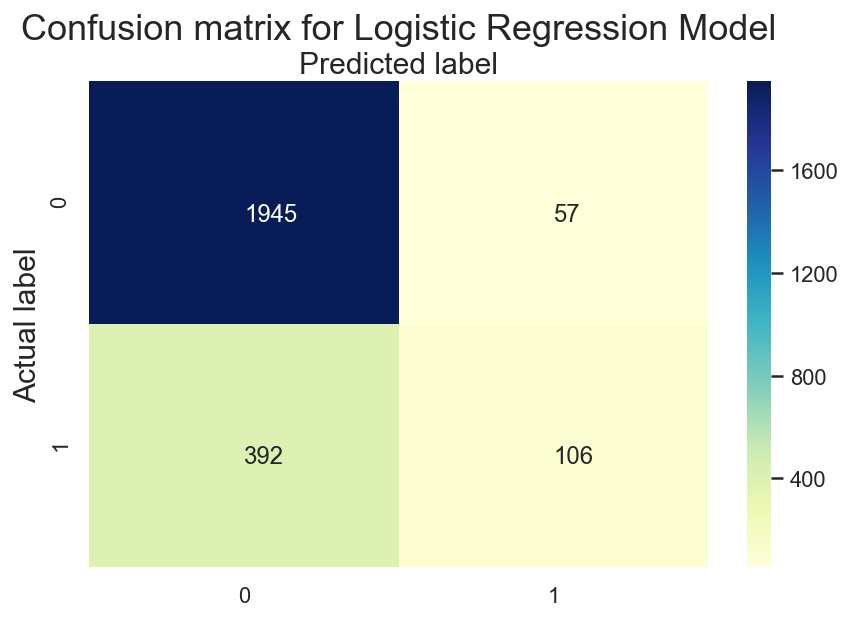

In [61]:
logreg_cm = confusion_matrix(y_test, logreg_pred)
# print(confusion_matrix(y_test, logreg_pred))
cm(logreg_cm, 'Logistic Regression')

### Decision Tree

In [62]:
# Basic model, was replaced by the tuned one -- treeclf
tree = DecisionTreeClassifier()


treeclf = DecisionTreeClassifier(criterion='entropy', 
                                      max_depth=9, 
                                      min_samples_leaf=4,
                                      min_samples_split=6)

treeclf = treeclf.fit(X_train, y_train)
treeclf_pred = treeclf.predict(X_test)

In [63]:
print(classification_report(y_test, treeclf_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92      2002
         1.0       0.75      0.45      0.56       498

    accuracy                           0.86      2500
   macro avg       0.81      0.70      0.74      2500
weighted avg       0.85      0.86      0.85      2500



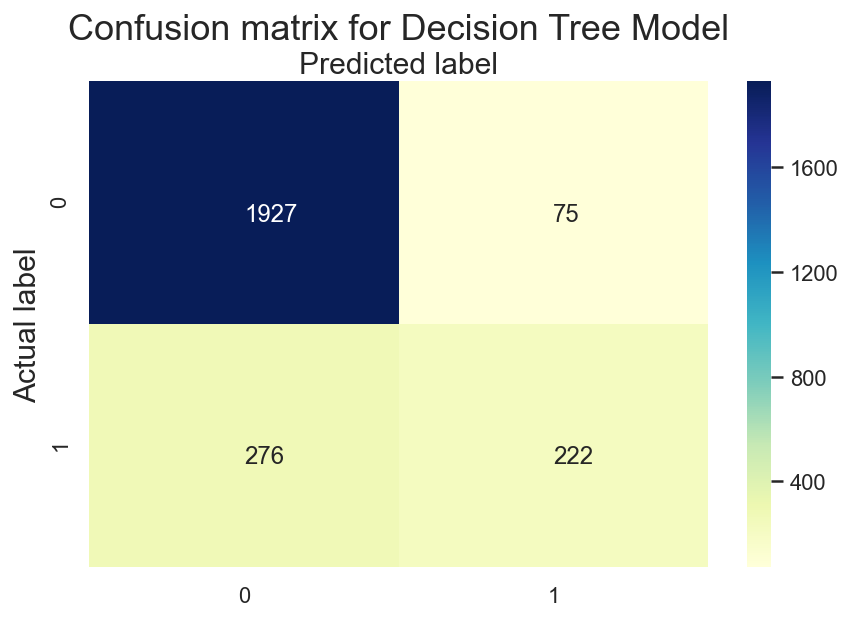

In [64]:
tree_cm = confusion_matrix(y_test, treeclf_pred)
# print(confusion_matrix(y_test, treeclf_pred))
cm(tree_cm, 'Decision Tree')

#### Model Tuning

In [65]:
param_dict = {
    "criterion":['gini', 'entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

In [66]:
tree_gs = GridSearchCV(tree, 
                       param_dict, 
                       cv=10, 
                       verbose=1,
                      n_jobs=-1)

tree_gs.fit(X_train_sm, y_train_sm)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


/Users/mengfanying/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mengfanying/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mengfanying/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/Users/mengfanying/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.mi

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [67]:
# tree_gs.best_params_
tree_gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4,
                       min_samples_split=3)

In [68]:
tree_gs.best_score_

0.8311667051086594

#### SMOTE (try)

In [69]:
treeclf.fit(X_train_sm, y_train_sm)
tree_sm_pred = treeclf.predict(X_test)

In [70]:
print(classification_report(y_test, tree_sm_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89      2002
         1.0       0.56      0.65      0.60       498

    accuracy                           0.83      2500
   macro avg       0.73      0.76      0.74      2500
weighted avg       0.84      0.83      0.83      2500



#### Important Features

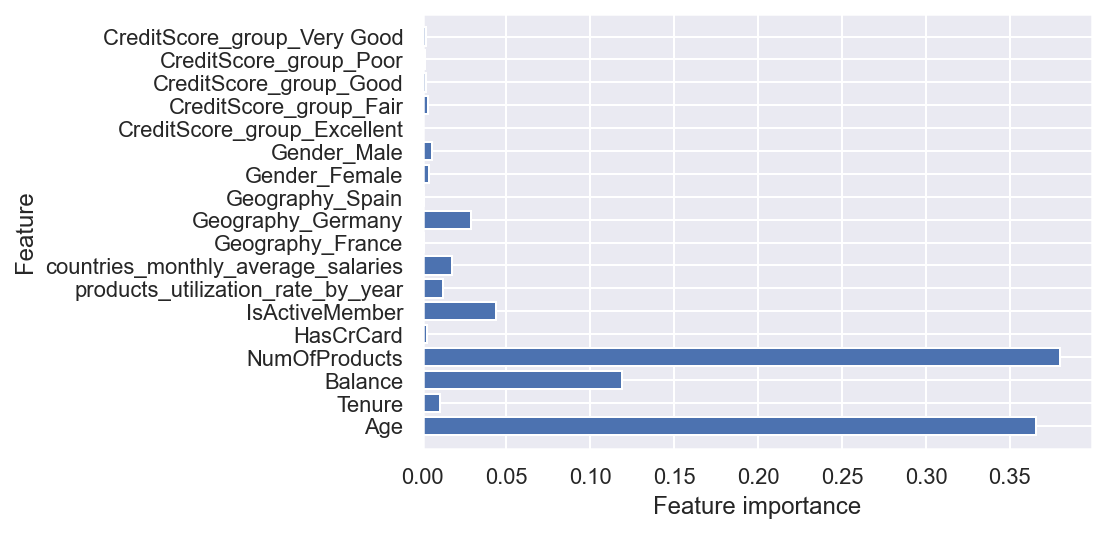

In [71]:
def plot_feature_importances(model, n_features, feature_names):
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(treeclf, len(X.columns), X.columns)

In [72]:
# churn.columns
# save for later use
important_features = ['Age','Balance', 'NumOfProducts', 'IsActiveMember', 
                       'countries_monthly_average_salaries', 'Tenure',
                       'products_utilization_rate_by_year', 'Geography_France',
                       'Geography_Germany', 'Geography_Spain']

### KNN

In [73]:
KNNclf = KNeighborsClassifier()
KNNclf.fit(X_train, y_train)
KNNclf_pred = KNNclf.predict(X_test)

In [74]:
print(classification_report(y_test, KNNclf_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.95      0.88      2002
         1.0       0.51      0.22      0.31       498

    accuracy                           0.80      2500
   macro avg       0.67      0.59      0.60      2500
weighted avg       0.77      0.80      0.77      2500



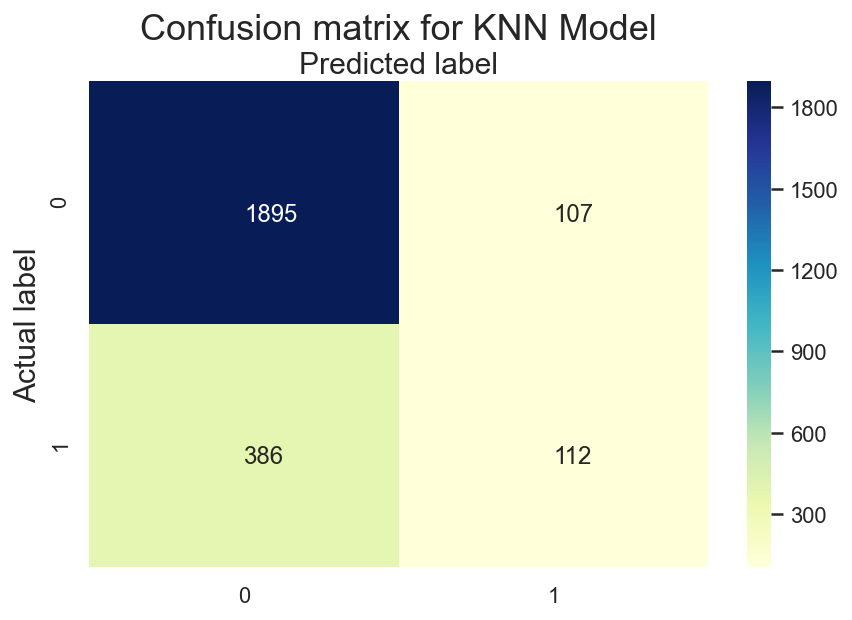

In [75]:
KNNclf_cm = confusion_matrix(y_test, KNNclf_pred)
# print(confusion_matrix(y_test, KNNclf_pred))
cm(KNNclf_cm, 'KNN')

### SVM

In [76]:
SVMclf = svm.SVC(probability=True)
SVMclf.fit(X_train, y_train)
SVMclf_pred = SVMclf.predict(X_test)

In [77]:
print(classification_report(y_test, SVMclf_pred))

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90      2002
         1.0       0.88      0.15      0.26       498

    accuracy                           0.83      2500
   macro avg       0.85      0.57      0.58      2500
weighted avg       0.84      0.83      0.77      2500



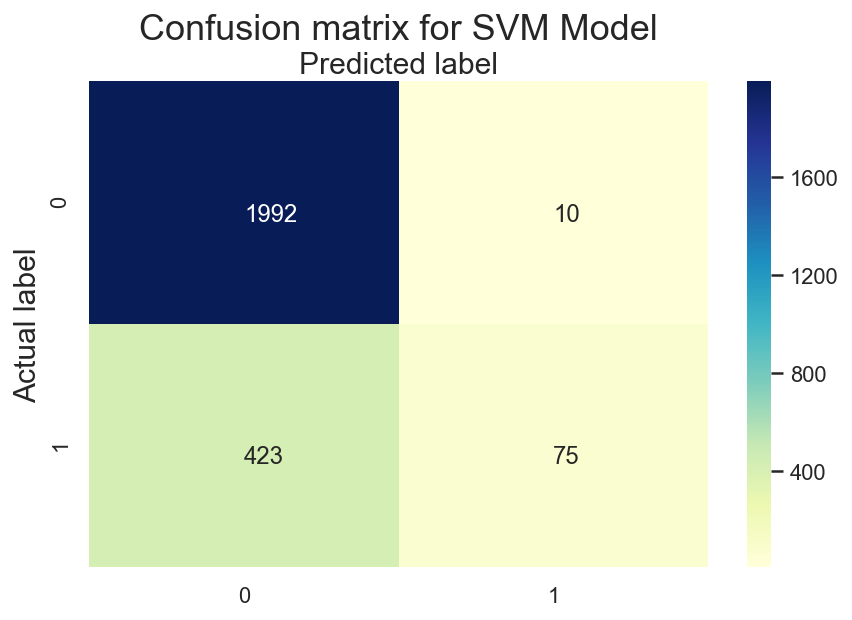

In [78]:
SVMclf_cm = confusion_matrix(y_test, SVMclf_pred)
# print(confusion_matrix(y_test, SVMclf_pred))
cm(SVMclf_cm, 'SVM')

### Random Forest

In [79]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [80]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      2002
         1.0       0.77      0.47      0.58       498

    accuracy                           0.87      2500
   macro avg       0.82      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500



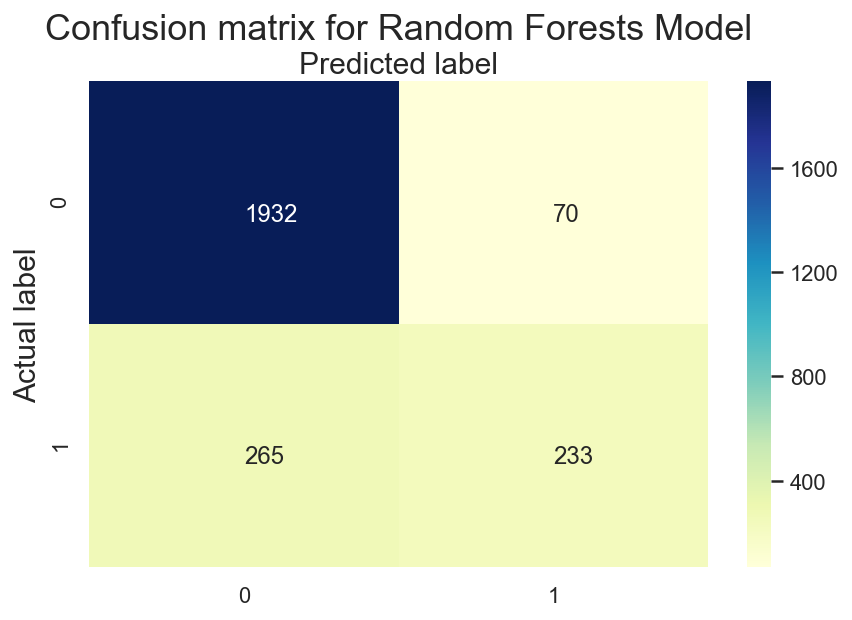

In [81]:
rf_cm = confusion_matrix(y_test, rf_pred)
# print(confusion_matrix(y_test, rf_pred))
cm(rf_cm, 'Random Forests')

### XGBoost

In [82]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

[14:48:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [83]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      2002
         1.0       0.72      0.50      0.59       498

    accuracy                           0.86      2500
   macro avg       0.80      0.73      0.75      2500
weighted avg       0.85      0.86      0.85      2500



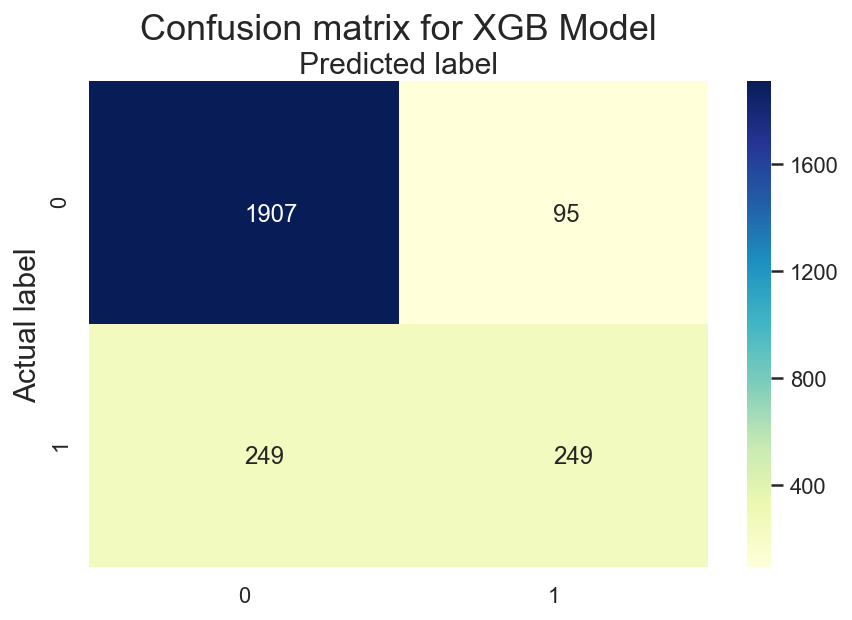

In [84]:
xgb_cm = confusion_matrix(y_test, xgb_pred)
# print(confusion_matrix(y_test, xgb_pred))
cm(xgb_cm, 'XGB')

### Compare Accuracy

In [85]:
model_dict = {'Logistics Regression':logreg_pred,
             'Decision Tree':treeclf_pred,
             'KNN':KNNclf_pred,
             'SVM':SVMclf_pred,
             'Random Forests':rf_pred,
             'XGBoost':xgb_pred}

In [86]:
for k in model_dict:
    model_comp(k, model_dict[k])

Logistics Regression
Precision: 0.65
Recall: 0.21
Accuracy: 0.82
----------------------------
Decision Tree
Precision: 0.75
Recall: 0.45
Accuracy: 0.86
----------------------------
KNN
Precision: 0.51
Recall: 0.22
Accuracy: 0.8
----------------------------
SVM
Precision: 0.88
Recall: 0.15
Accuracy: 0.83
----------------------------
Random Forests
Precision: 0.77
Recall: 0.47
Accuracy: 0.87
----------------------------
XGBoost
Precision: 0.72
Recall: 0.5
Accuracy: 0.86
----------------------------


### Compare ROC

In [87]:
logreg_pred_proba = logreg.predict_proba(X_test)[::,1]
logreg_fpr, logreg_tpr, logreg_ = metrics.roc_curve(y_test, logreg_pred_proba)
logreg_auc = metrics.roc_auc_score(y_test, logreg_pred_proba)

In [88]:
treeclf_pred_proba = treeclf.predict_proba(X_test)[::,1]
treeclf_fpr, treeclf_tpr, treeclf_ = metrics.roc_curve(y_test, treeclf_pred_proba)
treeclf_auc = metrics.roc_auc_score(y_test, treeclf_pred_proba)

In [89]:
KNNclf_pred_proba = KNNclf.predict_proba(X_test)[::,1]
KNNclf_fpr, KNNclf_tpr, KNNclf_ = metrics.roc_curve(y_test, KNNclf_pred_proba)
KNNclf_auc = metrics.roc_auc_score(y_test, KNNclf_pred_proba)

In [90]:
SVMclf_pred_proba = SVMclf.predict_proba(X_test)[::,1]
SVMclf_fpr, SVMclf_tpr, SVMclf_ = metrics.roc_curve(y_test, SVMclf_pred_proba)
SVMclf_auc = metrics.roc_auc_score(y_test, SVMclf_pred_proba)

In [91]:
rf_pred_proba = rf.predict_proba(X_test)[::,1]
rf_fpr, rf_tpr, rf_ = metrics.roc_curve(y_test, rf_pred_proba)
rf_auc = metrics.roc_auc_score(y_test, rf_pred_proba)

In [92]:
xgb_pred_proba = xgb.predict_proba(X_test)[::,1]
xgb_fpr, xgb_tpr, xgb_ = metrics.roc_curve(y_test, xgb_pred_proba)
xgb_auc = metrics.roc_auc_score(y_test, xgb_pred_proba)

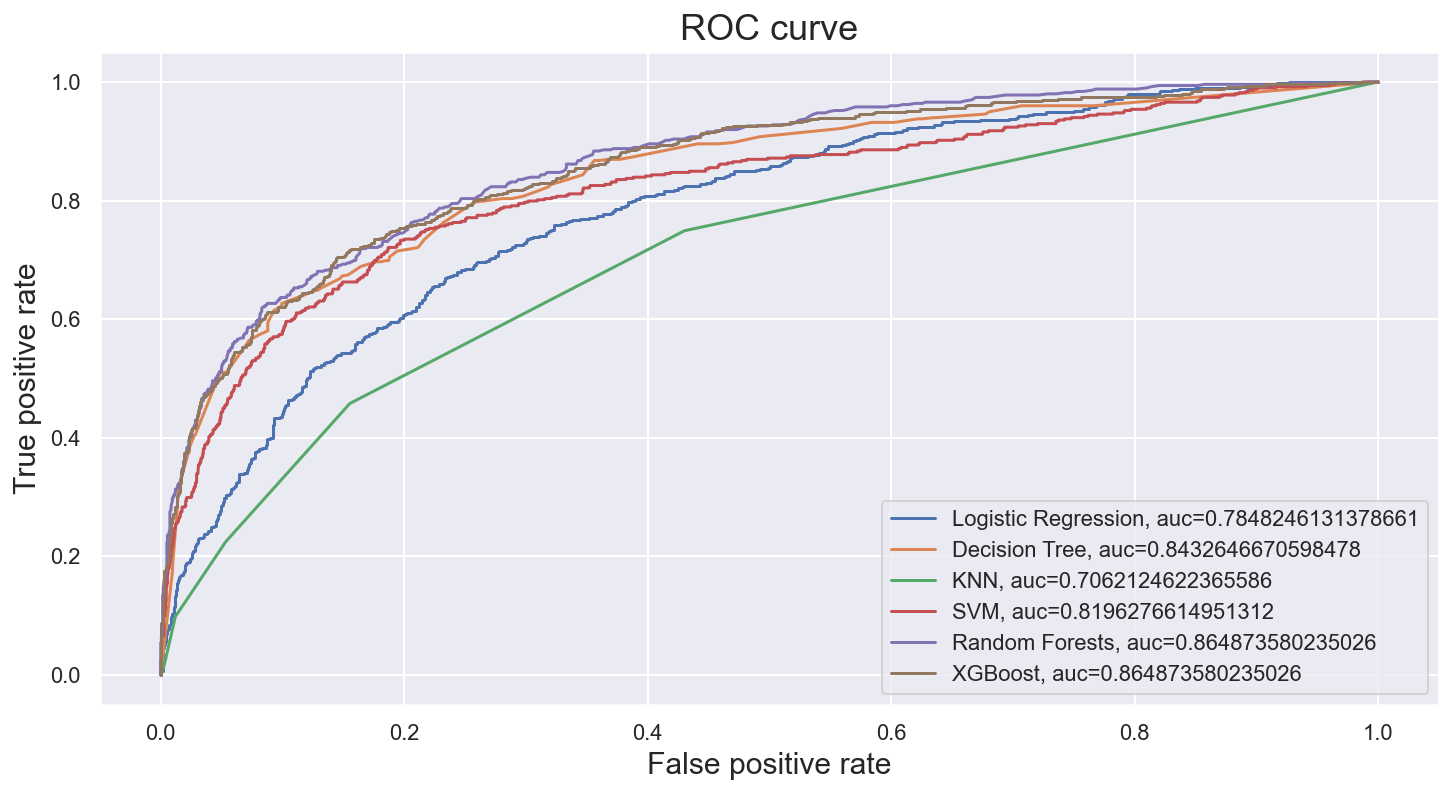

In [93]:
plt.figure(figsize = (12,6), linewidth= 1)

plt.plot(logreg_fpr, logreg_tpr,label="Logistic Regression, auc="+str(logreg_auc))
plt.plot(treeclf_fpr, treeclf_tpr,label="Decision Tree, auc="+str(treeclf_auc))
plt.plot(KNNclf_fpr, KNNclf_tpr,label="KNN, auc="+str(KNNclf_auc))
plt.plot(SVMclf_fpr, SVMclf_tpr,label="SVM, auc="+str(SVMclf_auc))
plt.plot(rf_fpr, rf_tpr,label="Random Forests, auc="+str(rf_auc))
plt.plot(xgb_fpr, xgb_tpr,label="XGBoost, auc="+str(rf_auc))

plt.legend(loc=4)
plt.xlabel('False positive rate', fontsize =15)
plt.ylabel('True positive rate', fontsize =15)
plt.title('ROC curve', fontsize =18)
plt.show()

## Improve model

### method 1: Hyperparameter Tuning

In [94]:
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

In [95]:
xgb_gs = GridSearchCV(xgb, param_grid, n_jobs=5, 
                   cv=5, 
                   scoring='roc_auc',
                   verbose=2, refit=True)

In [96]:
xgb_gs.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[14:48:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel...
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=None),
             n_jobs=5,
             para

In [97]:
# tree_gs.best_params_
xgb_gs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, monotone_constraints='()',
              n_estimators=5, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=1337, silent=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [98]:
xgb_gs.best_score_

0.8390528499810124

In [99]:
xgb_tuned = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, monotone_constraints='()',
              n_estimators=5, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=1337, silent=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

xgb_tuned.fit(X_train, y_train)
xgb_tuned_pred = xgb_tuned.predict(X_test)

[14:48:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [100]:
print(classification_report(y_test, xgb_tuned_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91      2002
         1.0       0.90      0.25      0.39       498

    accuracy                           0.85      2500
   macro avg       0.87      0.62      0.65      2500
weighted avg       0.85      0.85      0.81      2500



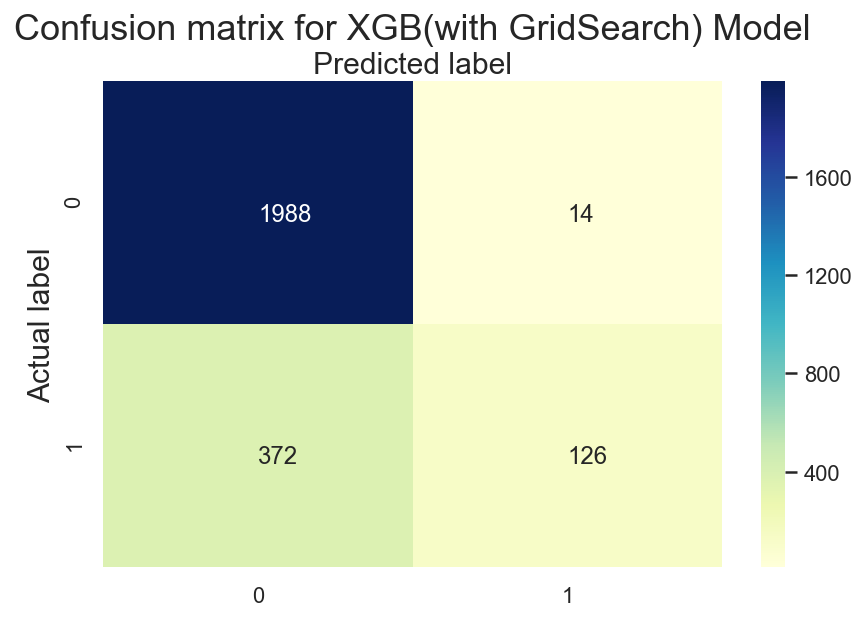

In [101]:
xgb_tuned_cm = confusion_matrix(y_test, xgb_tuned_pred)
# print(confusion_matrix(y_test, xgb_pred))
cm(xgb_tuned_cm, 'XGB(with GridSearch)')

### method 2: SMOTE

We observed a class imbalance issue with a 20:80 split. Therefore, we decided to use a resampling technique SMOTE here. In this particular scenario, we oversample the minority class by synthetically generating additional samples.

In [102]:
from imblearn.over_sampling import SMOTE

In [103]:
sm = SMOTE(random_state = 2)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
# note: fit_sample was renamed to fit_resample in v0.4.

In [104]:
# check
# X_train_sm.shape
y_train_sm.shape

(11922,)

In [105]:
xgb_tuned.fit(X_train_sm, y_train_sm)
xgb_sm_pred = xgb_tuned.predict(X_test)

[14:48:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [106]:
print(classification_report(y_test, xgb_sm_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88      2002
         1.0       0.54      0.69      0.60       498

    accuracy                           0.82      2500
   macro avg       0.73      0.77      0.74      2500
weighted avg       0.84      0.82      0.83      2500



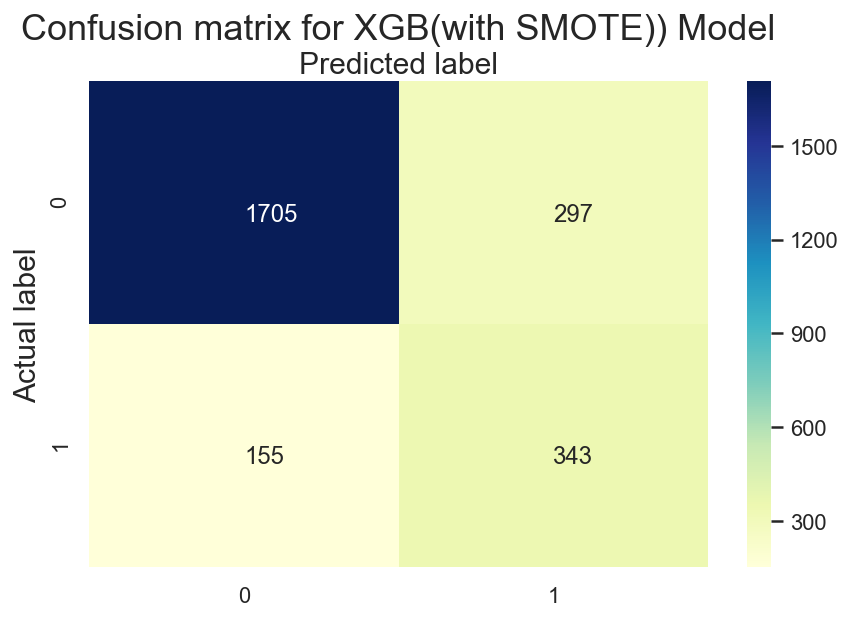

In [107]:
xgb_sm_cm = confusion_matrix(y_test, xgb_sm_pred)
# print(confusion_matrix(y_test, xgb_pred))
cm(xgb_sm_cm, 'XGB(with SMOTE))')

# Take-aways:

- Customers who are from Germany and Spain take up a small portion of the population
but are more likely to churn. This might be due to imbalanced services in different
regions.
- Customers who have a higher balance in their accounts are more likely to churn. The
bank should take action to keep those customers who are going to bring revenue to the
bank.
- Age, salary, balance are the top three important factors that will affect customer churn.
- Credit score has little contribution to predicting whether a customer will churn or not.

# Model Fitting Conclusions

Logistic Regression, KNN, and SVM do not have a desiring performance in predicting customer churn. The accuracy is 0.80, 0.80, and 0.81, respectively. Tuned Decision Tree and ensemble algorithms such as Random Forests and XGBoost have a better performance showing accuracy higher than 0.85. 

However, since the model is used to predict churn rate, we also look at the precision rate, and recall rate, and the number of customers who are predicted to churn is actually going to churn. 

Based on the aforementioned considerations and applied techniques such as hyperparameter tuning and SMOTE (which is a technique used for imbalanced classes), we nailed down to a final model with an overall 82% accuracy rate. In addition, the F1 score for customers who are labeled as “1” (Exited/Churned) is 61%, 1% higher than Decision Tree, 3% higher than Random Forests, and 3% higher than basic XGBoost. 